<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week5/Lec5_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [5]:
X[0:5], y[0:5]

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2]]),
 array([0, 0, 0, 0, 0]))

In [6]:
# adding a constant column for the coefficient
X_b = np.c_[np.ones((len(X), 1)), X]
X_b[0:5], y[0:5]

(array([[1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2]]),
 array([0, 0, 0, 0, 0]))

In [7]:
# Batch gradient descent

from scipy.special import expit

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(expit(X_b.dot(theta)) - y.reshape(-1,1))
    theta = theta - eta * gradients

In [8]:
theta

array([[-6.14355051],
       [ 3.77741766]])

In [9]:
# predict the probabilities using the logistic regression function
predit_proba_train = expit(X_b.dot(theta))
y_train_pred = [True if proba >= 0.5 else False for proba in predit_proba_train]
y_train = [True if y_val == 1 else False for y_val in y]

In [10]:
# Calculating confusion matrix ...

from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_train, y_train_pred)
print(cf_mat)
# TP FP
# FN TN

[[98  2]
 [ 4 46]]


In [11]:
precision = cf_mat[0,0]/cf_mat[0].sum()
recall = cf_mat[0,0]/(cf_mat[0,0] + cf_mat[1,0])
f1_score = 2*precision*recall/(precision + recall)
print(precision, recall, f1_score)

# same can be done by just calling the methods
# from sklearn.metrics import precision_score, recall_score, f1_score

0.98 0.9607843137254902 0.9702970297029702


#### Running the same with the logistic regression model from sklearn ...

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_train_pred_sklearn = log_reg.predict_proba(X)

In [48]:
# Note sklearn outputs two columns of probabilities - for 0 and 1, where p(0) = 1 - p(1) and vice-versa
# it is a general convention to take the probabilities of 1.
y_pred_sklearn = [True if proba >= 0.5 else False for proba in y_train_pred_sklearn[:,1]]


In [50]:
confusion_matrix(y_train, y_pred_sklearn) # same as our result!

array([[98,  2],
       [ 4, 46]])

Choice of threshold ...

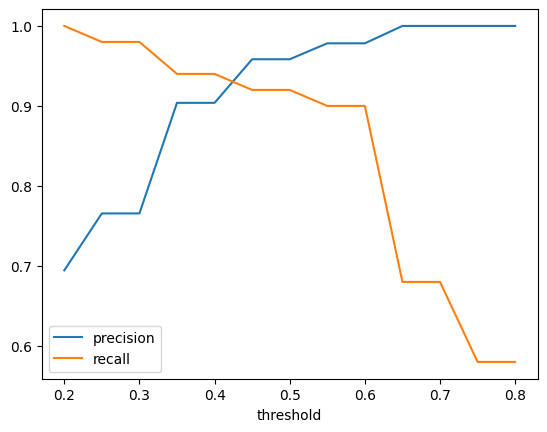

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


threshold_list = np.arange(0.2,0.8,0.05)
precision_list = []
recall_list = []

for threshold in threshold_list:
  predictions = [True if proba >= threshold else False for proba in y_train_pred_sklearn[:,1]]
  precision_list.append(precision_score(y_train, predictions))
  recall_list.append(recall_score(y_train, predictions))

plt.plot(threshold_list, precision_list)
plt.plot(threshold_list, recall_list)
plt.xlabel("threshold")
plt.legend(["precision", "recall"])
plt.show()




In [55]:
# In this case a balanced threshold is around 0.45/0.5 (visually) - need not be the best threshold, which depends on your requirement

better_pred = [True if proba >= 0.5 else False for proba in y_train_pred_sklearn[:,1]]
print("precision: ", precision_score(y_train, better_pred),
      "\n", "recall: ", recall_score(y_train, better_pred),
      "\n" "f1_score: ", f1_score(y_train, better_pred))

precision:  0.9583333333333334 
 recall:  0.92 
f1_score:  0.9387755102040817


#### Assignment:
1. Write and execute the corresponding codes for batch and mini-batch gradient descent. Compare precision, recall and f1_score.
2. Take more than one feature (sepal_length, sepal_width, petal_length, petal_width) and try the same.